In [1]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys
import re
from matplotlib.pyplot import figure

In [2]:
cwd = os.getcwd() + "/ACC"

print(cwd)

os.chdir(cwd)

/home/jm/vscode/Python/pytorch/Fall Dectection/ACC


## MHEALTH Dataset [1]
* 24 columns of data
* Column 1: acceleration from the chest sensor (X axis)
* Column 2: acceleration from the chest sensor (Y axis)
* Column 3: acceleration from the chest sensor (Z axis)
* Column 4: electrocardiogram signal (lead 1) 
* Column 5: electrocardiogram signal (lead 2)
* Column 6: acceleration from the left-ankle sensor (X axis)
* Column 7: acceleration from the left-ankle sensor (Y axis)
* Column 8: acceleration from the left-ankle sensor (Z axis)
* Column 9: gyro from the left-ankle sensor (X axis)
* Column 10: gyro from the left-ankle sensor (Y axis)
* Column 11: gyro from the left-ankle sensor (Z axis)
* Column 13: magnetometer from the left-ankle sensor (X axis)
* Column 13: magnetometer from the left-ankle sensor (Y axis)
* Column 14: magnetometer from the left-ankle sensor (Z axis)
* Column 15: acceleration from the right-lower-arm sensor (X axis)
* Column 16: acceleration from the right-lower-arm sensor (Y axis)
* Column 17: acceleration from the right-lower-arm sensor (Z axis)
* Column 18: gyro from the right-lower-arm sensor (X axis)
* Column 19: gyro from the right-lower-arm sensor (Y axis)
* Column 20: gyro from the right-lower-arm sensor (Z axis)
* Column 21: magnetometer from the right-lower-arm sensor (X axis)
* Column 22: magnetometer from the right-lower-arm sensor (Y axis)
* Column 23: magnetometer from the right-lower-arm sensor (Z axis)
* Column 24: Label/Activity (0 for the null class)


In [3]:
CONVERTED = True

if(not CONVERTED):
    path = "/home/jm/vscode/Python/pytorch/Fall Dectection/MHEALTHDATASET"

    os.chdir(path)

    mhealth_data = np.array([], dtype=np.float32)

    #gets data from file specified by file_path
    def get_contents(file_path):
        global mhealth_data
        
        #chest sensor
        chest_x_accel = []
        chest_y_accel = []
        chest_z_accel = []
        
        #electrocardiogram signals
        ecs1 = []
        ecs2 = []
        
        #lower left ankle acceleration data
        l_ankle_x_accel = []
        l_ankle_y_accel = []
        l_ankle_z_accel = []
        
        #left ankle gyro data
        l_ankle_x_g = []
        l_ankle_y_g= []
        l_ankle_z_g = []
        
        #magnetometer from left-ankle
        l_ankle_x_mag = []
        l_ankle_y_mag = []
        l_ankle_z_mag = []
        
        #right lower arm accerleration data
        r_arm_x_accel = []
        r_arm_y_accel = []
        r_arm_z_accel = []

        #right lower arm gyro data
        r_arm_x_g = []
        r_arm_y_g = []
        r_arm_z_g = []
        
        #right lower arm magnetometer
        r_arm_x_mag = []
        r_arm_y_mag = []
        r_arm_z_mag = []
        
        #label
        actvities = []

        with open(file_path,'r') as file:

            # lines = file.readlines()[:]

            for line in file:
                data = line.split()
                
                #chest sensor
                chest_x_accel = np.append(chest_x_accel, np.float32(data[0]))
                chest_y_accel = np.append(chest_y_accel, np.float32(data[1]))
                chest_z_accel = np.append(chest_z_accel, np.float32(data[2]))

                #electrocardiogram signals
                ecs1 = np.append(ecs1, np.float32(data[3]))
                ecs2 = np.append(ecs2, np.float32(data[4]))
                
                #lower left ankle acceleration data
                l_ankle_x_accel = np.append(l_ankle_x_accel, np.float32(data[5]))
                l_ankle_y_accel = np.append(l_ankle_y_accel, np.float32(data[6]))
                l_ankle_z_accel = np.append(l_ankle_z_accel, np.float32(data[7]))
                
                #left ankle gyro data
                l_ankle_x_g = np.append(l_ankle_x_g, np.float32(data[8]))
                l_ankle_y_g = np.append(l_ankle_y_g, np.float32(data[9]))
                l_ankle_z_g = np.append(l_ankle_z_g, np.float32(data[10]))
                
                #magnetometer from left-ankle
                l_ankle_x_mag = np.append(l_ankle_x_mag, np.float32(data[11]))
                l_ankle_y_mag = np.append(l_ankle_y_mag, np.float32(data[12]))
                l_ankle_z_mag = np.append(l_ankle_z_mag, np.float32(data[13]))
                
                #right lower arm acceleration data
                r_arm_x_accel = np.append(r_arm_x_accel, np.float32(data[14]))
                r_arm_y_accel = np.append(r_arm_y_accel, np.float32(data[15]))
                r_arm_z_accel = np.append(r_arm_z_accel, np.float32(data[16]))
                
                #right lower arm gyro
                r_arm_x_g = np.append(r_arm_x_g, np.float32(data[17]))
                r_arm_y_g = np.append(r_arm_y_g, np.float32(data[18]))
                r_arm_z_g = np.append(r_arm_z_g, np.float32(data[19]))
                
                #right  lower arm magnetometer
                r_arm_x_mag = np.append(r_arm_x_mag, np.float32(data[20]))
                r_arm_y_mag = np.append(r_arm_y_mag, np.float32(data[21]))
                r_arm_z_mag = np.append(r_arm_z_mag, np.float32(data[22]))
                
                #label
                actvities = np.append(actvities, np.int32(data[23]))
                
                
        df = pd.DataFrame({
            'chest acceleration X-axis': chest_x_accel,
            'chest acceleration Y-axis': chest_y_accel,
            'chest acceleration Z-axis': chest_z_accel,
            'electrocardiogram signal 1': ecs1,
            'electrocardiogram signal 2': ecs2,
            'lower left ankle acceleration X-axis': l_ankle_x_accel,
            'lower left ankle acceleration Y-axis': l_ankle_y_accel,
            'lower left ankle acceleration Z-axis': l_ankle_z_accel,
            'lower left ankle gyro X-axis': l_ankle_x_g, 
            'lower left ankle gyro Y-axis': l_ankle_y_g,
            'lower left ankle gyro Z-axis': l_ankle_z_g,
            'lower left ankle magnetometer X-axis': l_ankle_x_mag,
            'lower left ankle magnetometer Y-axis': l_ankle_y_mag,
            'lower left ankle magnetometer Z-axis': l_ankle_y_mag,
            'lower right arm acceleration X-axis': r_arm_x_accel,
            'lower right arm acceleration Y-axis': r_arm_y_accel,
            'lower right arm acceleration Z-axis': r_arm_z_accel,
            'lower right arm gryo X-axis': r_arm_x_g,
            'lower right arm gryo Y-axis': r_arm_y_g,
            'lower right arm gryo Z-axis': r_arm_z_g,
            'lower right arm magnetometer X-axis': r_arm_x_mag,
            'lower right arm magnetometer Y-axis': r_arm_y_mag,
            'lower right arm magnetometer Z-axis': r_arm_z_mag,
            'label': actvities,
        })
                
        return df

In [4]:
if(not CONVERTED):
        
    dataframes = {}
    i = '0'

    folder_path = '/home/jm/vscode/Python/pytorch/Fall Dectection/MHEALTHDATASET CSV'

    #go through all files in directory and extract data from txt files
    for file in os.listdir():
        if file.endswith(".log"):
            file_path = f"{path}/{file}"

            print(f"Currently working on: {file_path}")
            cur = get_contents(file_path)
            name = "subject" + i
            i = chr(ord(i) + 1)
            print(name)
            dataframes[name] = cur
            
            csv_filename = os.path.splitext(file)[0] + '.csv'
            cur.to_csv(os.path.join(folder_path, csv_filename), index=False)
            
    mhealth_data.dtype

In [5]:
if(not CONVERTED):
    dataframes = {}
    i = '0'

    folder_path = '/home/jm/vscode/Python/pytorch/Fall Dectection/MHEALTHDATASET_CSV'

    #go through all files in directory and extract data from txt files
    for file in os.listdir():
        if file.endswith(".log"):
            file_path = f"{path}/{file}"

            print(f"Currently working on: {file_path}")
            cur = get_contents(file_path)
            name = "subject" + i
            i = chr(ord(i) + 1)
            print(name)
            dataframes[name] = cur
            
            csv_filename = os.path.splitext(file)[0] + '.csv'
            cur.to_csv(os.path.join(folder_path, csv_filename), index=False)
            
    mhealth_data.dtype

In [6]:
import pandas as pd
import json

if(not CONVERTED):
    # Replace 'mhealth_dataset.log' with the actual path to your .log file
    log_file_path = cwd

    # Initialize an empty list to store parsed data
    data = []

    # Read each line in the log file
    with open(log_file_path, 'r') as file:
        for line in file:
            # Assuming each line is JSON formatted
            record = json.loads(line)
            data.append(record)

    # Convert list of dictionaries to a pandas DataFrame
    df = pd.DataFrame(data)

    # Display the first few rows of the dataframe to verify
    print(df.head())


In [7]:
df = pd.read_csv('/home/jm/vscode/Python/pytorch/Fall Dectection/MHEALTHDATASET_CSV/mHealth_subject1.csv')
df

,chest acceleration X-axis,chest acceleration Y-axis,chest acceleration Z-axis,electrocardiogram signal 1,electrocardiogram signal 2,lower left ankle acceleration X-axis,lower left ankle acceleration Y-axis,lower left ankle acceleration Z-axis,lower left ankle gyro X-axis,lower left ankle gyro Y-axis,...,lower right arm acceleration X-axis,lower right arm acceleration Y-axis,lower right arm acceleration Z-axis,lower right arm gryo X-axis,lower right arm gryo Y-axis,lower right arm gryo Z-axis,lower right arm magnetometer X-axis,lower right arm magnetometer Y-axis,lower right arm magnetometer Z-axis,label
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-8.6499,-4.57810,0.187760,-0.44902,-1.01030,0.034483,-2.350000,-1.610200,-0.030899,0.0
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-8.6275,-4.31980,0.023595,-0.44902,-1.01030,0.034483,-2.163200,-0.882540,0.326570,0.0
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-8.5055,-4.27720,0.275720,-0.44902,-1.01030,0.034483,-1.617500,-0.165620,-0.030693,0.0
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-8.6279,-4.31630,0.367520,-0.45686,-1.00820,0.025862,-1.077100,0.006945,-0.382620,0.0
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-8.7008,-4.14590,0.407290,-0.45686,-1.00820,0.025862,-0.536840,0.175900,-1.095500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161275,-9.4032,0.464170,-3.29510,0.272110,-0.050235,2.1463,-9.2841,2.28640,-0.888680,-0.95497,...,-4.0618,4.61190,7.188900,-0.65490,0.54415,0.676720,40.180000,14.369000,-29.304001,0.0
161276,-9.5201,0.751360,-3.84820,-0.104660,-0.025118,2.0773,-9.5717,2.24010,-0.903530,-0.96998,...,-4.4840,5.07440,6.441200,-0.65490,0.54415,0.676720,26.900999,-2.929500,-30.118999,0.0
161277,-9.3682,1.239600,-3.02530,-0.138150,-0.079540,1.7497,-9.3127,2.39560,-0.903530,-0.96998,...,-3.1657,0.98528,7.528400,-0.65490,0.54415,0.676720,17.288000,5.330800,-30.393000,0.0
161278,-8.6702,1.185900,-3.01960,-0.066981,-0.050235,1.8910,-9.3342,2.21890,-0.903530,-0.96998,...,-1.0351,-0.85876,6.123700,-0.65490,0.54415,0.676720,17.430000,19.502001,-28.726999,0.0


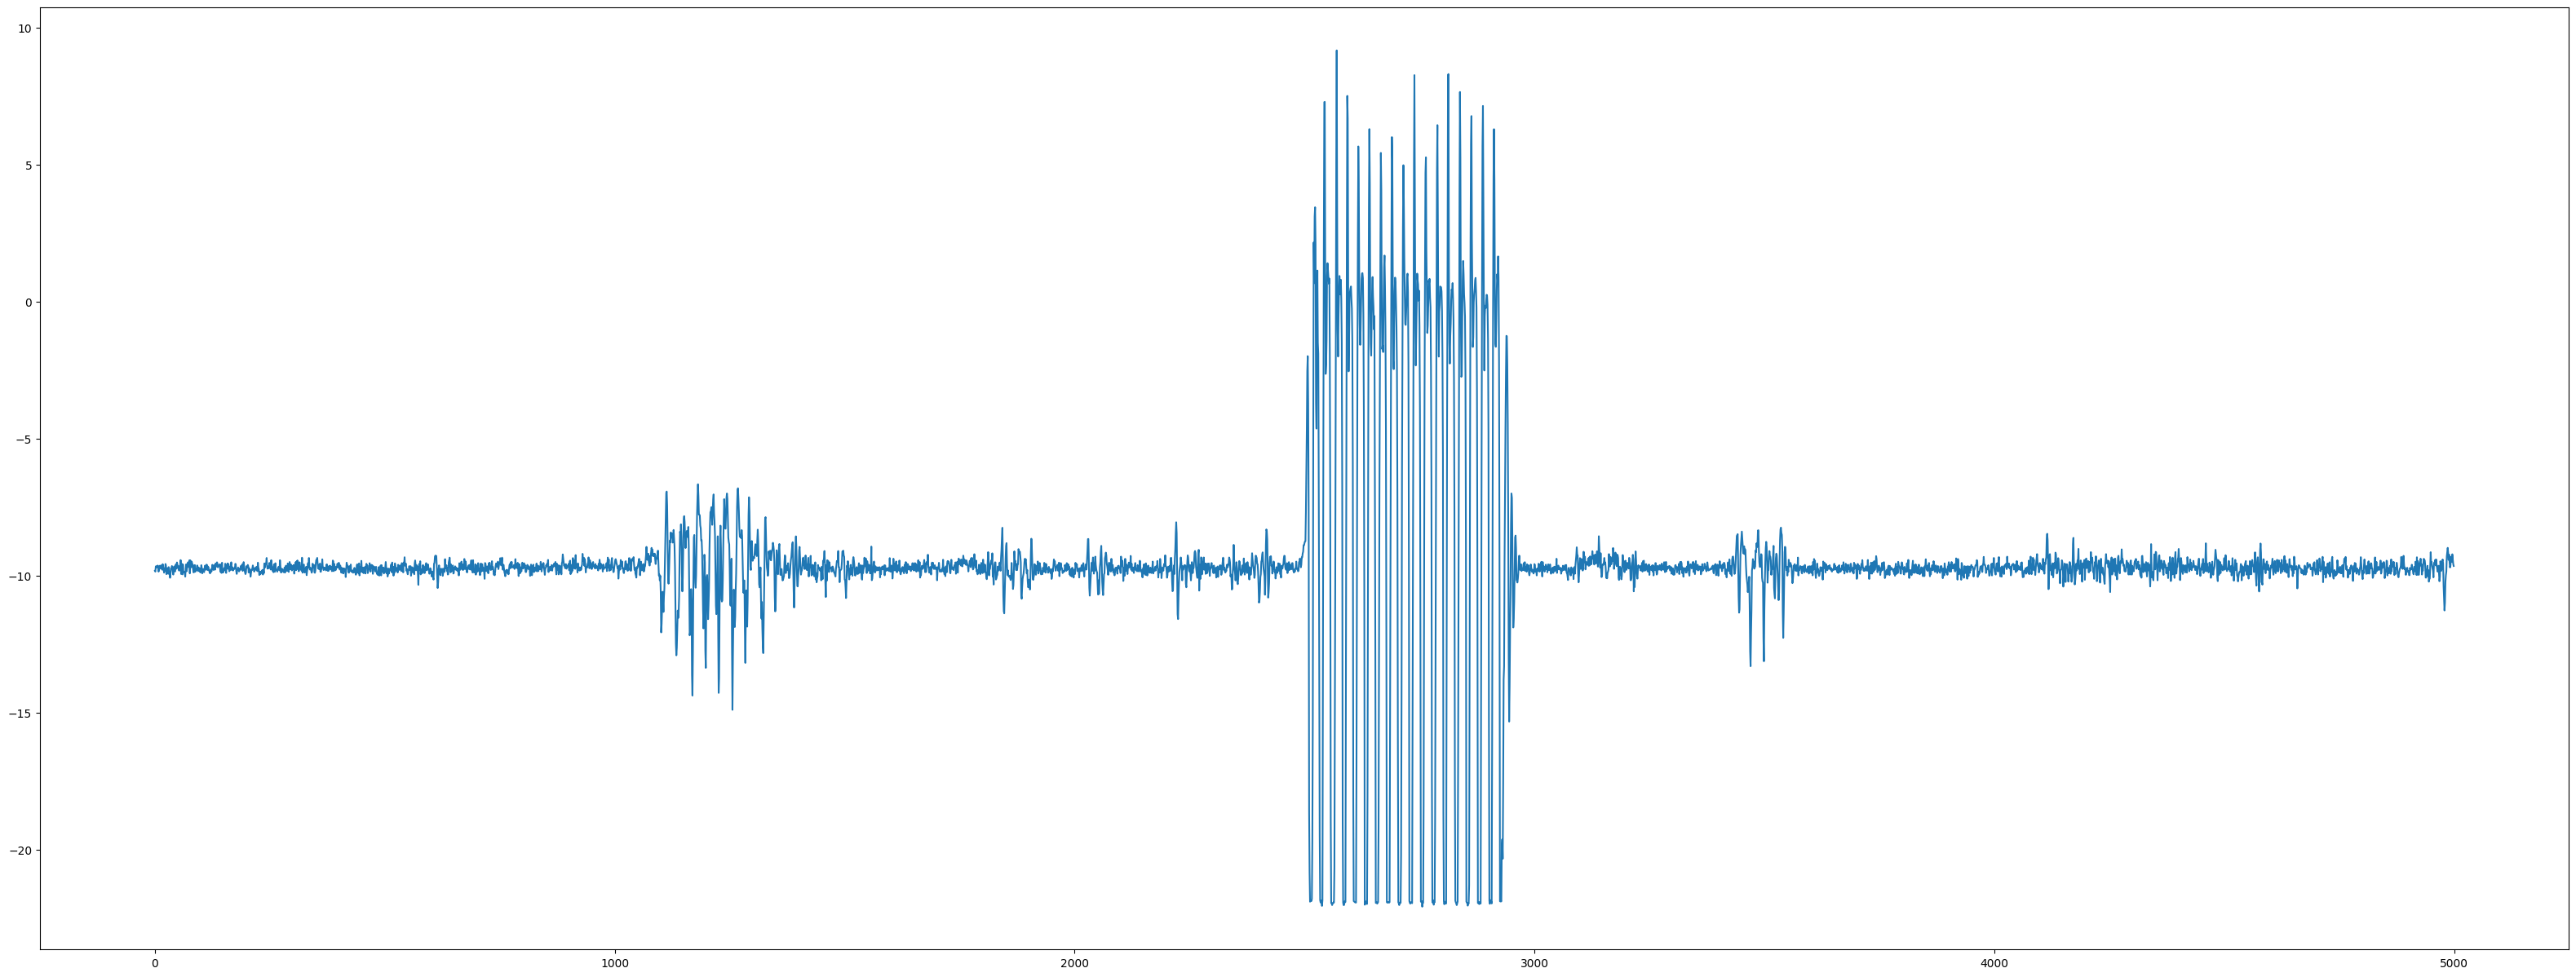

In [9]:
figure(figsize=(40, 15))
plt.plot(df['chest acceleration X-axis'][:5000])

## A Dataset with Accelerometer, Magnetometer, Gyroscope, Environment, and GPS Data [14]
### Each file comprises the data in a matrix format, with one line per sample, and one column per channel. The channels are as follows:
* Time of sample in millisecond
* Ankle (shank) acceleration - horizontal forward acceleration [mg]
* Ankle (shank) acceleration - vertical [mg]
* Ankle (shank) acceleration - horizontal lateral [mg]
* Upper leg (thigh) acceleration - horizontal forward acceleration [mg]
* Upper leg (thigh) acceleration - vertical [mg]
* Upper leg (thigh) acceleration - horizontal lateral [mg]
* Trunk acceleration - horizontal forward acceleration [mg]
* Trunk acceleration - vertical [mg]
* Trunk acceleration - horizontal lateral [mg]
* Annotation [0, 1, or 2]



### The meaning of the annotations are as follows:
* 0: not part of the experiment. For instance the sensors are installed on the user or the user is performing activities unrelated to the experimental protocol, such as debriefing
* 1: experiment, no freeze (can be any of stand, walk, turn)
* 2: freeze


In [ ]:
CONVERTED = False

if(not CONVERTED):
    path = "/home/jm/vscode/Python/pytorch/Fall Dectection/DaphnetFreezingGait/dataset"

    os.chdir(path)

    #gets data from file specified by file_path
    def get_contents(file_path):
        
        #chest sensor
        chest_x_accel = []
        chest_y_accel = []
        chest_z_accel = []
        
        #electrocardiogram signals
        ecs1 = []
        ecs2 = []
        
        #lower left ankle acceleration data
        l_ankle_x_accel = []
        l_ankle_y_accel = []
        l_ankle_z_accel = []
        
        #left ankle gyro data
        l_ankle_x_g = []
        l_ankle_y_g= []
        l_ankle_z_g = []
        
        #magnetometer from left-ankle
        l_ankle_x_mag = []
        l_ankle_y_mag = []
        l_ankle_z_mag = []
        
        #right lower arm accerleration data
        r_arm_x_accel = []
        r_arm_y_accel = []
        r_arm_z_accel = []

        #right lower arm gyro data
        r_arm_x_g = []
        r_arm_y_g = []
        r_arm_z_g = []
        
        #right lower arm magnetometer
        r_arm_x_mag = []
        r_arm_y_mag = []
        r_arm_z_mag = []
        
        #label
        actvities = []

        with open(file_path,'r') as file:

            # lines = file.readlines()[:]

            for line in file:
                data = line.split()
                
                #chest sensor
                chest_x_accel = np.append(chest_x_accel, np.float32(data[0]))
                chest_y_accel = np.append(chest_y_accel, np.float32(data[1]))
                chest_z_accel = np.append(chest_z_accel, np.float32(data[2]))

                #electrocardiogram signals
                ecs1 = np.append(ecs1, np.float32(data[3]))
                ecs2 = np.append(ecs2, np.float32(data[4]))
                
                #lower left ankle acceleration data
                l_ankle_x_accel = np.append(l_ankle_x_accel, np.float32(data[5]))
                l_ankle_y_accel = np.append(l_ankle_y_accel, np.float32(data[6]))
                l_ankle_z_accel = np.append(l_ankle_z_accel, np.float32(data[7]))
                
                #left ankle gyro data
                l_ankle_x_g = np.append(l_ankle_x_g, np.float32(data[8]))
                l_ankle_y_g = np.append(l_ankle_y_g, np.float32(data[9]))
                l_ankle_z_g = np.append(l_ankle_z_g, np.float32(data[10]))
                
                #magnetometer from left-ankle
                l_ankle_x_mag = np.append(l_ankle_x_mag, np.float32(data[11]))
                l_ankle_y_mag = np.append(l_ankle_y_mag, np.float32(data[12]))
                l_ankle_z_mag = np.append(l_ankle_z_mag, np.float32(data[13]))
                
                #right lower arm acceleration data
                r_arm_x_accel = np.append(r_arm_x_accel, np.float32(data[14]))
                r_arm_y_accel = np.append(r_arm_y_accel, np.float32(data[15]))
                r_arm_z_accel = np.append(r_arm_z_accel, np.float32(data[16]))
                
                #right lower arm gyro
                r_arm_x_g = np.append(r_arm_x_g, np.float32(data[17]))
                r_arm_y_g = np.append(r_arm_y_g, np.float32(data[18]))
                r_arm_z_g = np.append(r_arm_z_g, np.float32(data[19]))
                
                #right  lower arm magnetometer
                r_arm_x_mag = np.append(r_arm_x_mag, np.float32(data[20]))
                r_arm_y_mag = np.append(r_arm_y_mag, np.float32(data[21]))
                r_arm_z_mag = np.append(r_arm_z_mag, np.float32(data[22]))
                
                #label
                actvities = np.append(actvities, np.int32(data[23]))
                
                
        df = pd.DataFrame({
            'chest acceleration X-axis': chest_x_accel,
            'chest acceleration Y-axis': chest_y_accel,
            'chest acceleration Z-axis': chest_z_accel,
            'electrocardiogram signal 1': ecs1,
            'electrocardiogram signal 2': ecs2,
            'lower left ankle acceleration X-axis': l_ankle_x_accel,
            'lower left ankle acceleration Y-axis': l_ankle_y_accel,
            'lower left ankle acceleration Z-axis': l_ankle_z_accel,
            'lower left ankle gyro X-axis': l_ankle_x_g, 
            'lower left ankle gyro Y-axis': l_ankle_y_g,
            'lower left ankle gyro Z-axis': l_ankle_z_g,
            'lower left ankle magnetometer X-axis': l_ankle_x_mag,
            'lower left ankle magnetometer Y-axis': l_ankle_y_mag,
            'lower left ankle magnetometer Z-axis': l_ankle_y_mag,
            'lower right arm acceleration X-axis': r_arm_x_accel,
            'lower right arm acceleration Y-axis': r_arm_y_accel,
            'lower right arm acceleration Z-axis': r_arm_z_accel,
            'lower right arm gryo X-axis': r_arm_x_g,
            'lower right arm gryo Y-axis': r_arm_y_g,
            'lower right arm gryo Z-axis': r_arm_z_g,
            'lower right arm magnetometer X-axis': r_arm_x_mag,
            'lower right arm magnetometer Y-axis': r_arm_y_mag,
            'lower right arm magnetometer Z-axis': r_arm_z_mag,
            'label': actvities,
        })
                
        return df